# About the dataset

In the dataset we have 14 columns where we need to predict that wheather the customer will exit the bank or not.

# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
dataset= pd.read_csv('E:\\Complete-Deep-Learning-master\\ANN\\Churn_Modelling.csv')

In [38]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


So we have 3 catagorical columns and none of the columns have null values. Further the column no 0 to 3 does not give any significance to the model. so lets drop the same.

In [40]:
dataset = dataset.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [41]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [43]:
Geography= pd.get_dummies(x['Geography'])
Gender=pd.get_dummies(x['Gender'])

In [44]:
x=x.drop(['Geography','Gender'],axis=1)

In [45]:
x=pd.concat([x,Geography,Gender],axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =0)

# Feature scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [74]:
x_train=sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

# ANN

In [75]:
import keras

Using TensorFlow backend.


In [77]:
from keras.models import Sequential


In [78]:
from keras.layers import Dense

In [84]:
from keras.layers import LeakyReLU,ELU,PReLU

In [85]:
from keras.layers import Dropout


Initializing ANN

In [86]:
classifier=Sequential()

Adding the first input layer and hidden layer

In [88]:
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 13))


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


Adding the second hidden layer


In [89]:
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


Adding the second output layer


In [90]:
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform',activation='sigmoid'))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


Compiling the ANN

In [91]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting the ANN to the Training set


In [92]:
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 580us/step - loss: 0.5546 - accuracy: 0.7485 - val_loss: 0.5028 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 201us/step - loss: 0.4851 - accuracy: 0.7962 - val_loss: 0.4773 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 201us/step - loss: 0.4663 - accuracy: 0.7962 - val_loss: 0.4640 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 195us/step - loss: 0.4549 - accuracy: 0.7962 - val_loss: 0.4557 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 198us/step - loss: 0.4474 - accuracy: 0.7962 - val_loss: 0.4505 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.4428 - accuracy: 0.7962 - val_loss: 0.4472 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 196us/step

list all data in history


In [93]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


# summarize history for accuracy

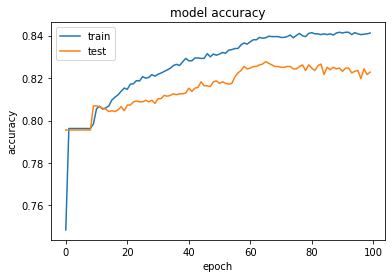

In [95]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss


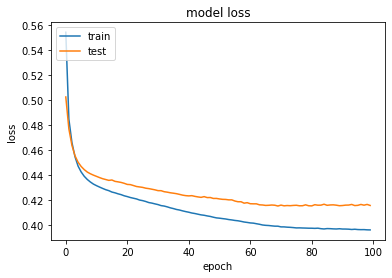

In [96]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Making the predictions and evaluating the model


In [103]:
y_pred=classifier.predict(x_test)
y_pred = (y_pred>0.5)

# calculating the accuracy

In [98]:
from sklearn.metrics import accuracy_score

In [105]:
score=print(accuracy_score(y_test,y_pred))

0.834
